# DS-SF-34 | Unit Project | 2 | Exploratory Data Analysis | Starter Code

In this project, you will implement the exploratory analysis plan developed in Unit Project 1.  This will lay the groundwork for our modeling exercise in Unit Project 3.

First, load the python libraries you will need for this project:

In [100]:
import os

import pandas as pd
pd.set_option('display.max_rows', 10)
pd.set_option('display.notebook_repr_html', True)
pd.set_option('display.max_columns', 10)

import statsmodels.api as sm
import statsmodels.formula.api as smf

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

import seaborn as sns

Then, read in your dataset:

In [101]:
df = pd.read_csv(os.path.join('..', '..', 'dataset', 'dataset-ucla-admissions.csv'))

df

,admit,gre,gpa,prestige
0,0,380.0,3.61,3.0
1,1,660.0,3.67,3.0
2,1,800.0,4.00,1.0
3,1,640.0,3.19,4.0
4,0,520.0,2.93,4.0
...,...,...,...,...
395,0,620.0,4.00,2.0
396,0,560.0,3.04,3.0
397,0,460.0,2.63,2.0
398,0,700.0,3.65,2.0


## Questions

> ### Question 1.  How many observations are in our dataset?

In [102]:
# TODO
len(df)

400

Answer: TODO

> ### Question 2.  Create a summary table.

In [103]:
# TODO
df.describe()

,admit,gre,gpa,prestige
count,400.000000,398.000000,398.00000,399.000000
mean,0.317500,588.040201,3.39093,2.486216
std,0.466087,115.628513,0.38063,0.945333
min,0.000000,220.000000,2.26000,1.000000
25%,0.000000,520.000000,3.13000,2.000000
50%,0.000000,580.000000,3.39500,2.000000
75%,1.000000,660.000000,3.67000,3.000000
max,1.000000,800.000000,4.00000,4.000000


> ### Question 3.  Why would `gre` have a larger variance than `gpa`?


In [104]:
# TODO
df.var()

admit           0.217237
gre         13369.953040
gpa             0.144879
prestige        0.893654
dtype: float64

In [13]:
# We should expect the gre variance to be greater than the gpa variance because the possible gre range is greater than the gpa range. Variance is the average squared distance from the mean, therefore varables that have larger distances from the mean will have greater variances.  

> ### Question 4.  Drop data points with missing data.

In [105]:
# TODO
df.isnull().sum()

admit       0
gre         2
gpa         2
prestige    1
dtype: int64

In [106]:
df.isnull().sum().sum()

5

In [108]:
df = df.dropna()

> ### Question 5.  Confirm that you dropped the correct data.  How can you tell?

In [109]:
# TODO
df.isnull().sum()

admit       0
gre         0
gpa         0
prestige    0
dtype: int64

In [110]:
df.shape[0]

397

Answer: TODO

> ### Question 6.  Create boxplots for `gre` and `gpa`.

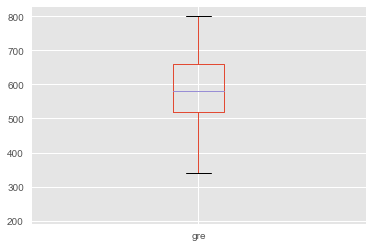

In [80]:
# TODO
df.gre.plot(kind = 'box')

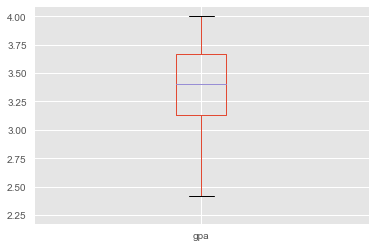

In [81]:
df.gpa.plot(kind = 'box')

> ### Question 7.  What do boxplots show?

Answer: After dropping the NA values we don't have any outlier values for either GPA and GRE. 

> ### Question 8.  Plot the distribution of each variable.

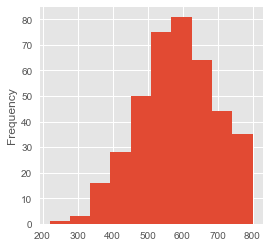

In [82]:
# TODO
df.gre.plot(kind = 'hist', figsize = (4,4))


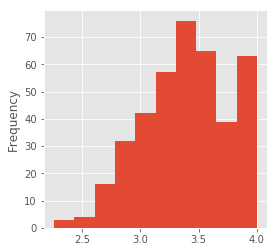

In [55]:
# TODO
df.gpa.plot (kind = 'hist', figsize = (4,4))

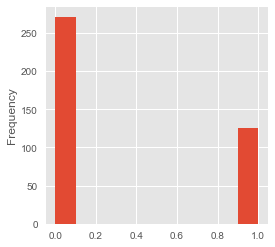

In [83]:
# TODO
df.admit.plot (kind = 'hist', figsize = (4,4))

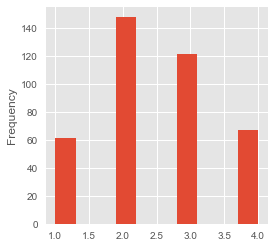

In [84]:
# TODO
df.prestige.plot (kind = 'hist', figsize = (4,4))

> ### Question 9.  If our model had an assumption of a normal distribution for `gre` and `gpa`, would we meet that requirement?  Would their distributions need correction?  If so, why, why not?  How?

In [85]:
# TODO
df.gre.describe()

count    397.000000
mean     587.858942
std      115.717787
min      220.000000
25%      520.000000
50%      580.000000
75%      660.000000
max      800.000000
Name: gre, dtype: float64

In [94]:
model = smf.ols(formula = 'admit ~ gre', data = df).fit()

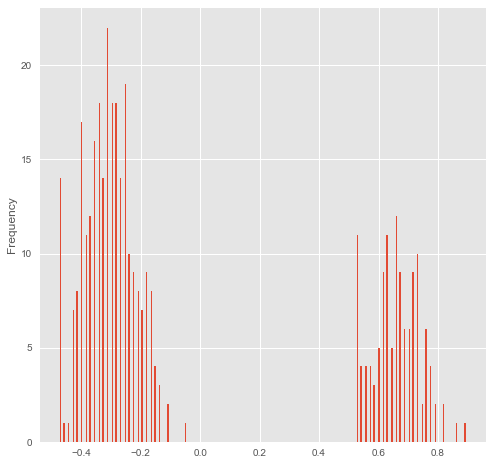

In [95]:
model.resid.plot(kind = 'hist', bins = 250, figsize = (8, 8))

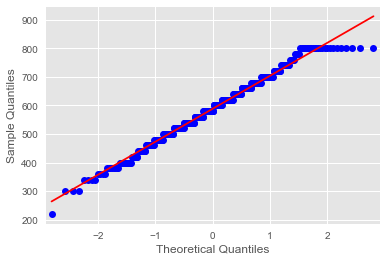

In [92]:
sm.qqplot(df.gre, line = 's')

pass


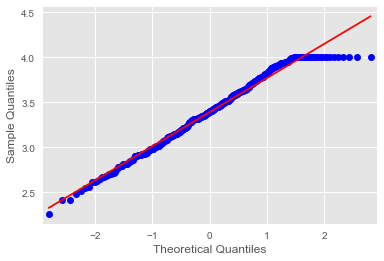

In [93]:
sm.qqplot(df.gpa, line = 's')

pass

In [89]:
# TODO
#GRE follows an approximately normal distrubtion given it's mean (~587) and it's 50% quartile or median (580)are very close. The distribution is bell shaped
#The GPA results do not appear to follow a normal distrubtion as the distribution curve is no bell shapped and mean and 50% quartile are no close. 

> ### Question 10.  Create a correlation matrix for the dataset.

In [98]:
# TODO
model = smf.ols(formula = 'admit ~ gre + gpa + prestige', data = df).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  admit   R-squared:                       0.095
Model:                            OLS   Adj. R-squared:                  0.088
Method:                 Least Squares   F-statistic:                     13.69
Date:                Mon, 15 May 2017   Prob (F-statistic):           1.65e-08
Time:                        14:11:12   Log-Likelihood:                -239.99
No. Observations:                 397   AIC:                             488.0
Df Residuals:                     393   BIC:                             503.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     -0.1610      0.218     -0.737      0.462        -0.591     0.269
gre            0.0004      0.000      2.063      0.040      2.05e-05     0.001
gpa            0.1462      0.064      2.296      0.022         0.021     0.271
prestige      -0.1097      0.024     -4.606      0.000        -0.156    -0.063
==============================================================================
Omnibus:                      191.690   Durbin-Watson:                   1.939
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               51.364
Skew:                           0.670   Prob(JB):                     7.02e-12
Kurtosis:                       1.855   Cond. No.                     6.02e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.02e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [97]:
# TODO
model = smf.ols(formula = 'gre ~ gpa', data = df).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    gre   R-squared:                       0.146
Model:                            OLS   Adj. R-squared:                  0.144
Method:                 Least Squares   F-statistic:                     67.66
Date:                Mon, 15 May 2017   Prob (F-statistic):           2.84e-15
Time:                        14:11:09   Log-Likelihood:                -2417.6
No. Observations:                 397   AIC:                             4839.
Df Residuals:                     395   BIC:                             4847.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept    193.0449     48.299      3.997      0.000        98.089   288.001
gpa          116.3873     14.150      8.225      0.000        88.569   144.206
==============================================================================
Omnibus:                        1.159   Durbin-Watson:                   1.910
Prob(Omnibus):                  0.560   Jarque-Bera (JB):                1.172
Skew:                          -0.045   Prob(JB):                        0.557
Kurtosis:                       2.749   Cond. No.                         33.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

> ### Question 11.  What did you find?  Which of our variables are potentially colinear?

Answer: 
GRE scores and GPA scores are potentiallly colinear given the gpa coeffient above is 116.3873 with a p-value < 0 and a 95% CI that does not contain 0. 

> ### Question 12.  Write an analysis plan for exploring the association between graduate school admission rates and prestige of undergraduate schools.

Answer: Take a radom sample of UCLA gradute student applicants and determine if they were accepted and what prestige ranking of their former school. 

> ### Question 13.  What is your hypothesis?

Answer: There is no association between the likelihood a UCLA applicant will be accepted and their gre, gpa, or the prestige of their school. 